In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_excel("../Datasets/Heart_disease.xlsx")
df.head()

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PatientID                  237630 non-null  int64  
 1   State                      237630 non-null  object 
 2   Sex                        237630 non-null  object 
 3   GeneralHealth              237630 non-null  object 
 4   AgeCategory                237630 non-null  object 
 5   HeightInMeters             237630 non-null  float64
 6   WeightInKilograms          237630 non-null  float64
 7   BMI                        237630 non-null  float64
 8   HadHeartAttack             237630 non-null  int64  
 9   HadAngina                  237630 non-null  int64  
 10  HadStroke                  237630 non-null  int64  
 11  HadAsthma                  237630 non-null  int64  
 12  HadSkinCancer              237630 non-null  int64  
 13  HadCOPD                    23

In [6]:
df.isnull().sum()

PatientID                    0
State                        0
Sex                          0
GeneralHealth                0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusL

In [7]:
df['HeighInFeet'] = df['HeightInMeters'] * 3.28084

<Axes: >

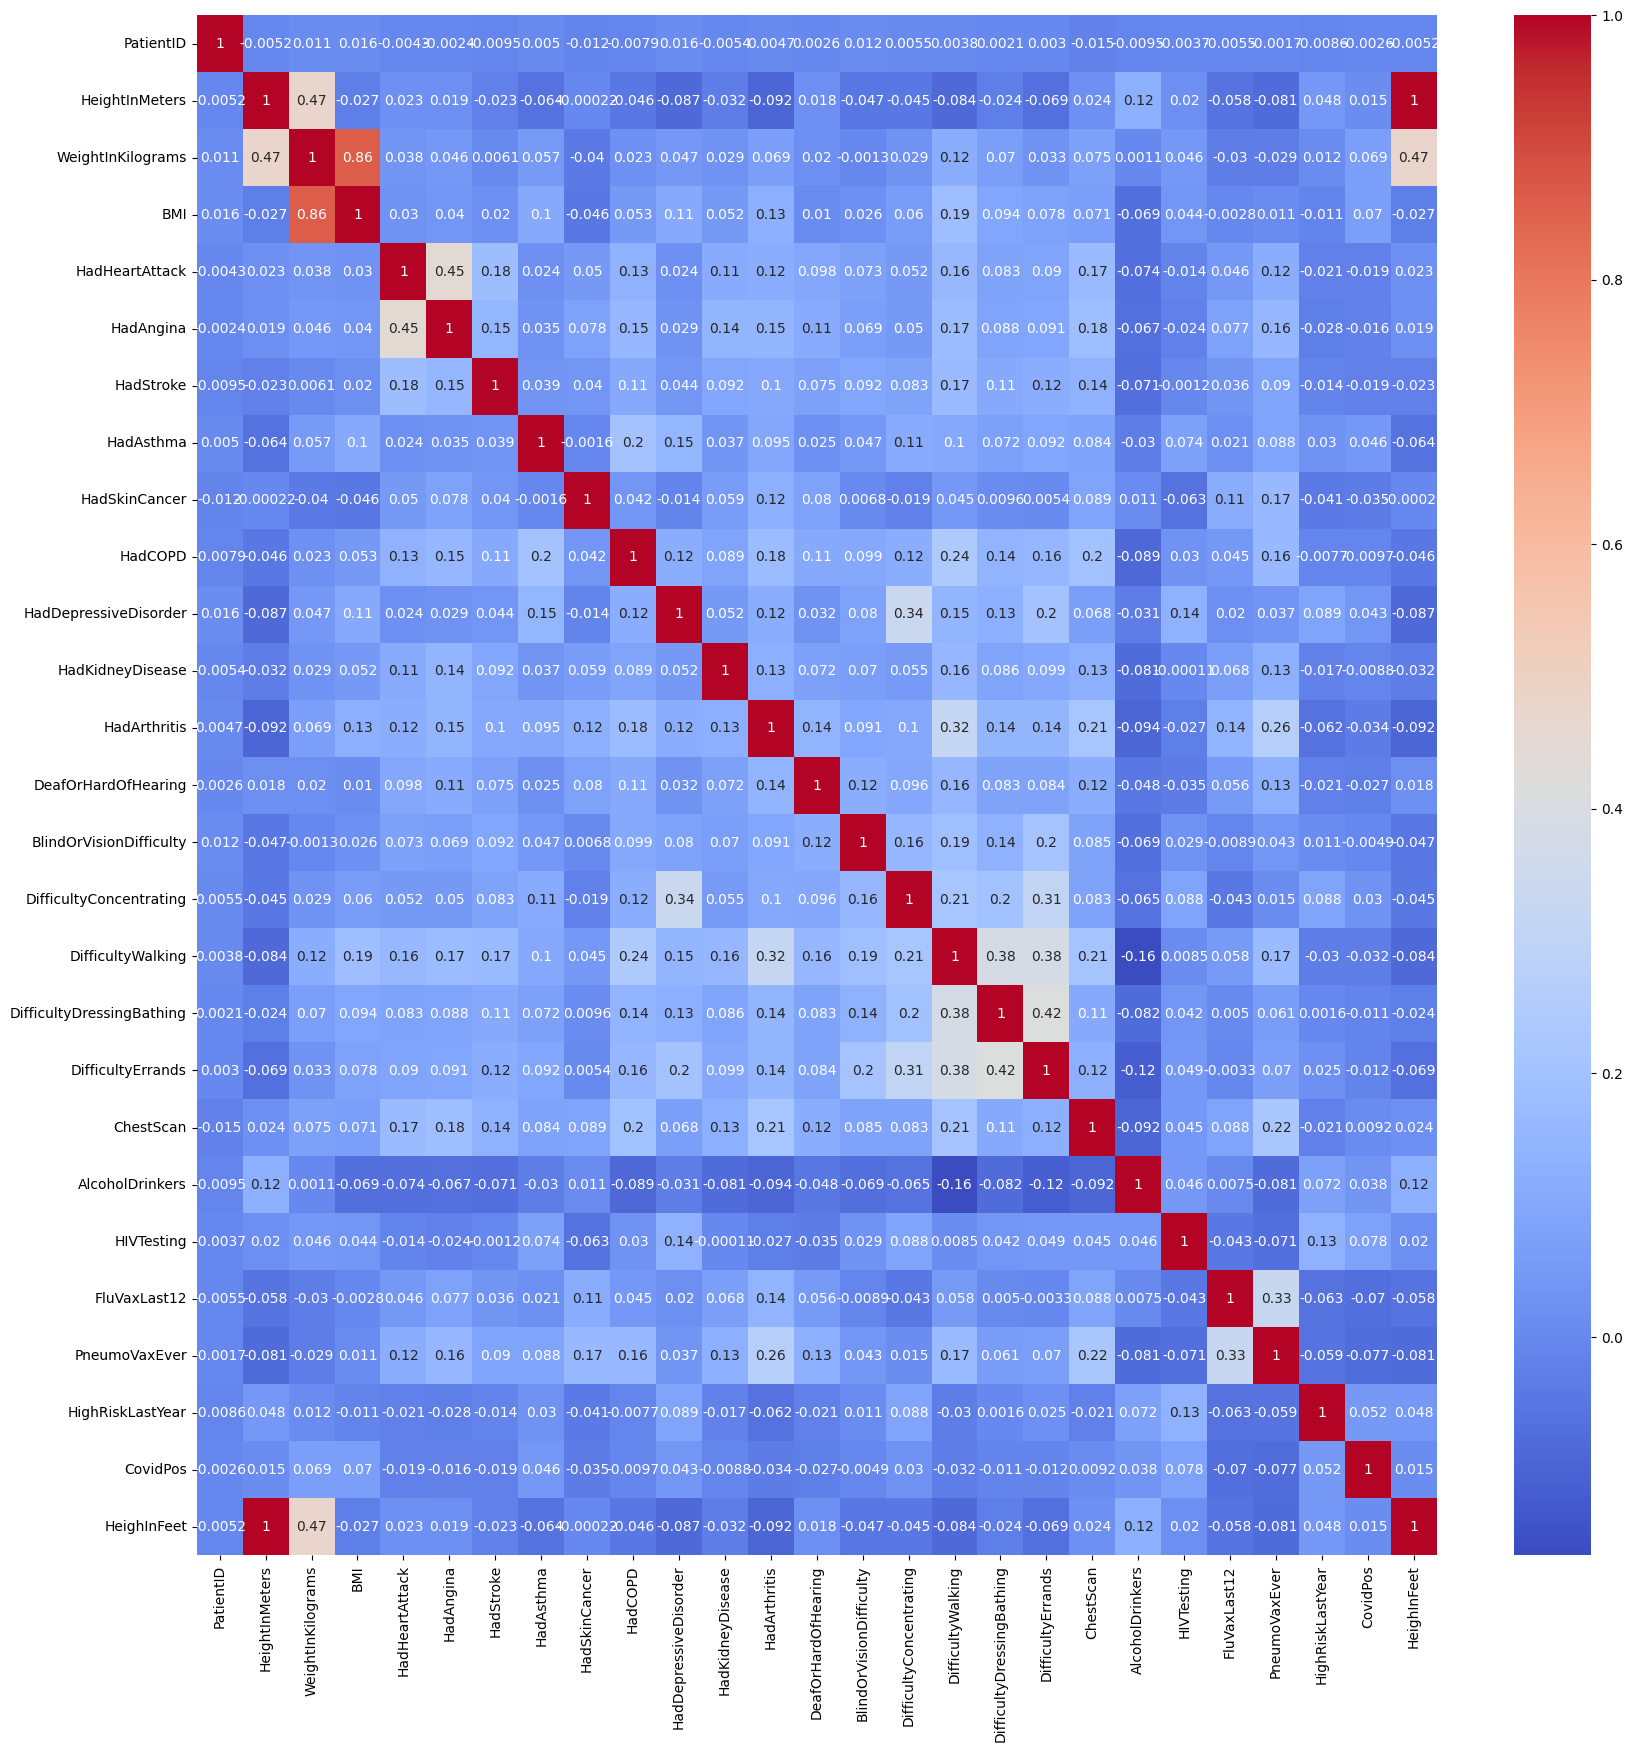

In [8]:
import seaborn as sns
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(20,20))

sns.heatmap(corr, annot=True, cmap='coolwarm')


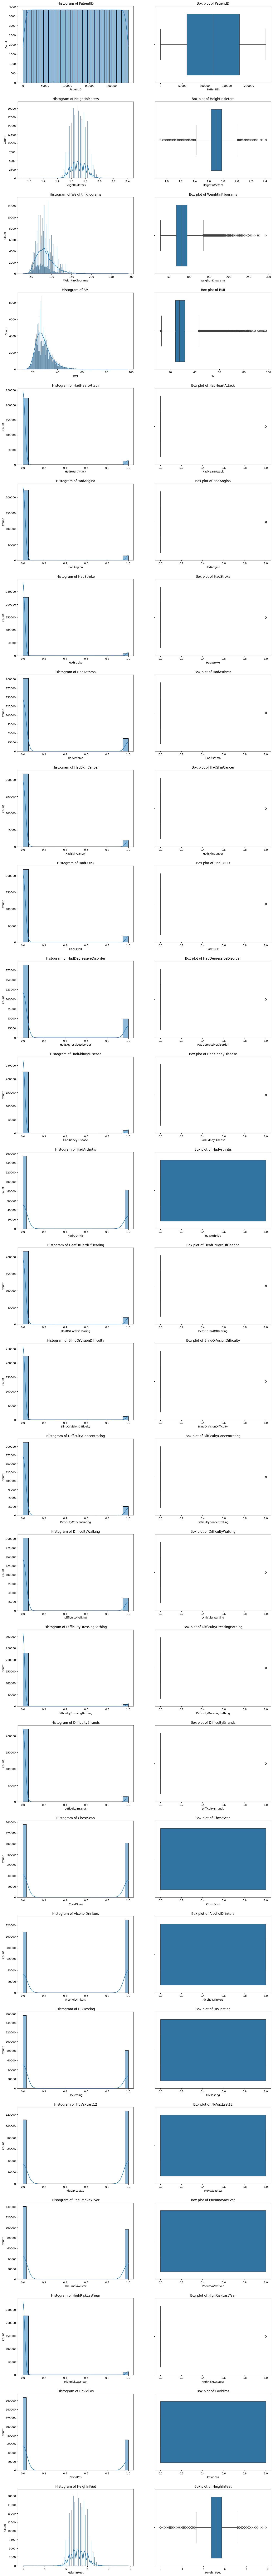

In [9]:
numerical_cols=df.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(15, 5 * len(numerical_cols)))

fig.tight_layout(pad=5.0)



for i, column in enumerate(numerical_cols):

    # Histogram

    sns.histplot(df[column], kde=True, ax=axes[i, 0])

    axes[i, 0].set_title(f'Histogram of {column}')

    

    # Box plot

    sns.boxplot(x=df[column], ax=axes[i, 1])

    axes[i, 1].set_title(f'Box plot of {column}')



plt.show()

In [10]:
df.columns

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'HeighInFeet'],
      dtype='object')

In [11]:
df.drop(['PatientID','State','TetanusLast10Tdap','HadStroke','HadAsthma','HadSkinCancer','HadDepressiveDisorder','HadDiabetes','DeafOrHardOfHearing','BlindOrVisionDifficulty','ECigaretteUsage','RaceEthnicityCategory','TetanusLast10Tdap','HighRiskLastYear'],axis="columns",inplace=True)

In [12]:
df.drop(['HadArthritis','DifficultyDressingBathing','DifficultyErrands','HIVTesting','FluVaxLast12','PneumoVaxEver','HeightInMeters'],axis='columns',inplace=True)

In [13]:
df.columns

Index(['Sex', 'GeneralHealth', 'AgeCategory', 'WeightInKilograms', 'BMI',
       'HadHeartAttack', 'HadAngina', 'HadCOPD', 'HadKidneyDisease',
       'DifficultyConcentrating', 'DifficultyWalking', 'SmokerStatus',
       'ChestScan', 'AlcoholDrinkers', 'CovidPos', 'HeighInFeet'],
      dtype='object')

In [14]:
df['SmokerStatus'].unique()

array(['Former smoker', 'Never smoked',
       'Current smoker - now smokes every day',
       'Current smoker - now smokes some days'], dtype=object)

In [15]:
df['SmokerStatus']=df['SmokerStatus'].replace({'Current smoker - now smokes every day':"smokes"})
df['SmokerStatus']=df['SmokerStatus'].replace({'Current smoker - now smokes some days': "smokes"})

In [16]:
df['SmokerStatus'].unique()

array(['Former smoker', 'Never smoked', 'smokes'], dtype=object)

In [17]:
def one_hot_encoding(df,columns):
    df=pd.concat([df,pd.get_dummies(df[columns],prefix=columns)],axis=1)
    df.drop(columns, axis=1, inplace=True)
    return df

df = one_hot_encoding(df, ['AgeCategory','GeneralHealth','Sex','SmokerStatus'])
df.head()


,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadCOPD,HadKidneyDisease,DifficultyConcentrating,DifficultyWalking,ChestScan,AlcoholDrinkers,...,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,Sex_Female,Sex_Male,SmokerStatus_Former smoker,SmokerStatus_Never smoked,SmokerStatus_smokes
0,84.820000,32.099998,0,1,0,0,0,1,1,0,...,False,True,False,False,False,True,False,True,False,False
1,71.669998,27.990000,0,0,0,0,0,0,0,0,...,False,False,False,False,True,True,False,True,False,False
2,71.209999,22.530001,0,0,0,0,0,0,0,1,...,True,False,False,False,False,False,True,False,True,False
3,95.250000,30.129999,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,True,True,False,False
4,78.019997,27.760000,0,0,0,0,0,0,1,0,...,False,False,True,False,False,True,False,False,True,False


In [18]:
df.replace({True:1,False:0})


/var/folders/1h/gvg1d3j93k54jclq_30b7vw40000gn/T/ipykernel_10498/4082310672.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({True:1,False:0})


,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadCOPD,HadKidneyDisease,DifficultyConcentrating,DifficultyWalking,ChestScan,AlcoholDrinkers,...,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good,Sex_Female,Sex_Male,SmokerStatus_Former smoker,SmokerStatus_Never smoked,SmokerStatus_smokes
0,84.820000,32.099998,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
1,71.669998,27.990000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
2,71.209999,22.530001,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
3,95.250000,30.129999,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
4,78.019997,27.760000,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237625,90.720001,36.580002,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
237626,72.570000,25.059999,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
237627,70.309998,22.889999,1,1,0,0,1,1,1,0,...,0,1,0,0,0,0,1,0,0,1
237628,46.720001,18.840000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0


In [19]:
df.columns

Index(['WeightInKilograms', 'BMI', 'HadHeartAttack', 'HadAngina', 'HadCOPD',
       'HadKidneyDisease', 'DifficultyConcentrating', 'DifficultyWalking',
       'ChestScan', 'AlcoholDrinkers', 'CovidPos', 'HeighInFeet',
       'AgeCategory_Age 18 to 24', 'AgeCategory_Age 25 to 29',
       'AgeCategory_Age 30 to 34', 'AgeCategory_Age 35 to 39',
       'AgeCategory_Age 40 to 44', 'AgeCategory_Age 45 to 49',
       'AgeCategory_Age 50 to 54', 'AgeCategory_Age 55 to 59',
       'AgeCategory_Age 60 to 64', 'AgeCategory_Age 65 to 69',
       'AgeCategory_Age 70 to 74', 'AgeCategory_Age 75 to 79',
       'AgeCategory_Age 80 or older', 'GeneralHealth_Excellent',
       'GeneralHealth_Fair', 'GeneralHealth_Good', 'GeneralHealth_Poor',
       'GeneralHealth_Very good', 'Sex_Female', 'Sex_Male',
       'SmokerStatus_Former smoker', 'SmokerStatus_Never smoked',
       'SmokerStatus_smokes'],
      dtype='object')

In [20]:
df.dtypes

WeightInKilograms              float64
BMI                            float64
HadHeartAttack                   int64
HadAngina                        int64
HadCOPD                          int64
HadKidneyDisease                 int64
DifficultyConcentrating          int64
DifficultyWalking                int64
ChestScan                        int64
AlcoholDrinkers                  int64
CovidPos                         int64
HeighInFeet                    float64
AgeCategory_Age 18 to 24          bool
AgeCategory_Age 25 to 29          bool
AgeCategory_Age 30 to 34          bool
AgeCategory_Age 35 to 39          bool
AgeCategory_Age 40 to 44          bool
AgeCategory_Age 45 to 49          bool
AgeCategory_Age 50 to 54          bool
AgeCategory_Age 55 to 59          bool
AgeCategory_Age 60 to 64          bool
AgeCategory_Age 65 to 69          bool
AgeCategory_Age 70 to 74          bool
AgeCategory_Age 75 to 79          bool
AgeCategory_Age 80 or older       bool
GeneralHealth_Excellent  

In [21]:
df["AgeCategory_0-9"] = 0  # No data for this range, keeping it as 0
df["AgeCategory_10-19"] = 0  # No data for this range, keeping it as 0
df["AgeCategory_20-24"] = df["AgeCategory_Age 18 to 24"]
df["AgeCategory_25-59"] = (
    df["AgeCategory_Age 25 to 29"]
    | df["AgeCategory_Age 30 to 34"]
    | df["AgeCategory_Age 35 to 39"]
    | df["AgeCategory_Age 40 to 44"]
    | df["AgeCategory_Age 45 to 49"]
    | df["AgeCategory_Age 50 to 54"]
    | df["AgeCategory_Age 55 to 59"]
)
df["AgeCategory_60 or older"] = (
    df["AgeCategory_Age 60 to 64"]
    | df["AgeCategory_Age 65 to 69"]
    | df["AgeCategory_Age 70 to 74"]
    | df["AgeCategory_Age 75 to 79"]
    | df["AgeCategory_Age 80 or older"]
)


In [22]:
df = df.drop(columns=[
    "AgeCategory_Age 18 to 24", "AgeCategory_Age 25 to 29", "AgeCategory_Age 30 to 34",
    "AgeCategory_Age 35 to 39", "AgeCategory_Age 40 to 44", "AgeCategory_Age 45 to 49",
    "AgeCategory_Age 50 to 54", "AgeCategory_Age 55 to 59", "AgeCategory_Age 60 to 64",
    "AgeCategory_Age 65 to 69", "AgeCategory_Age 70 to 74", "AgeCategory_Age 75 to 79",
    "AgeCategory_Age 80 or older"
])


In [23]:
df.columns

Index(['WeightInKilograms', 'BMI', 'HadHeartAttack', 'HadAngina', 'HadCOPD',
       'HadKidneyDisease', 'DifficultyConcentrating', 'DifficultyWalking',
       'ChestScan', 'AlcoholDrinkers', 'CovidPos', 'HeighInFeet',
       'GeneralHealth_Excellent', 'GeneralHealth_Fair', 'GeneralHealth_Good',
       'GeneralHealth_Poor', 'GeneralHealth_Very good', 'Sex_Female',
       'Sex_Male', 'SmokerStatus_Former smoker', 'SmokerStatus_Never smoked',
       'SmokerStatus_smokes', 'AgeCategory_0-9', 'AgeCategory_10-19',
       'AgeCategory_20-24', 'AgeCategory_25-59', 'AgeCategory_60 or older'],
      dtype='object')

In [24]:
df.head()

,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadCOPD,HadKidneyDisease,DifficultyConcentrating,DifficultyWalking,ChestScan,AlcoholDrinkers,...,Sex_Female,Sex_Male,SmokerStatus_Former smoker,SmokerStatus_Never smoked,SmokerStatus_smokes,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older
0,84.820000,32.099998,0,1,0,0,0,1,1,0,...,True,False,True,False,False,0,0,False,False,True
1,71.669998,27.990000,0,0,0,0,0,0,0,0,...,True,False,True,False,False,0,0,False,False,True
2,71.209999,22.530001,0,0,0,0,0,0,0,1,...,False,True,False,True,False,0,0,False,False,True
3,95.250000,30.129999,0,0,0,0,0,0,0,0,...,False,True,True,False,False,0,0,False,False,True
4,78.019997,27.760000,0,0,0,0,0,0,1,0,...,True,False,False,True,False,0,0,False,True,False


In [25]:
df.replace({True:1,False:0},inplace=True)

/var/folders/1h/gvg1d3j93k54jclq_30b7vw40000gn/T/ipykernel_10498/2938164920.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({True:1,False:0},inplace=True)


In [26]:
df.head()

,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadCOPD,HadKidneyDisease,DifficultyConcentrating,DifficultyWalking,ChestScan,AlcoholDrinkers,...,Sex_Female,Sex_Male,SmokerStatus_Former smoker,SmokerStatus_Never smoked,SmokerStatus_smokes,AgeCategory_0-9,AgeCategory_10-19,AgeCategory_20-24,AgeCategory_25-59,AgeCategory_60 or older
0,84.820000,32.099998,0,1,0,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
1,71.669998,27.990000,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2,71.209999,22.530001,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
3,95.250000,30.129999,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
4,78.019997,27.760000,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [27]:
df.dtypes

WeightInKilograms             float64
BMI                           float64
HadHeartAttack                  int64
HadAngina                       int64
HadCOPD                         int64
HadKidneyDisease                int64
DifficultyConcentrating         int64
DifficultyWalking               int64
ChestScan                       int64
AlcoholDrinkers                 int64
CovidPos                        int64
HeighInFeet                   float64
GeneralHealth_Excellent         int64
GeneralHealth_Fair              int64
GeneralHealth_Good              int64
GeneralHealth_Poor              int64
GeneralHealth_Very good         int64
Sex_Female                      int64
Sex_Male                        int64
SmokerStatus_Former smoker      int64
SmokerStatus_Never smoked       int64
SmokerStatus_smokes             int64
AgeCategory_0-9                 int64
AgeCategory_10-19               int64
AgeCategory_20-24               int64
AgeCategory_25-59               int64
AgeCategory_

In [28]:
X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']

In [29]:
X.dtypes

WeightInKilograms             float64
BMI                           float64
HadAngina                       int64
HadCOPD                         int64
HadKidneyDisease                int64
DifficultyConcentrating         int64
DifficultyWalking               int64
ChestScan                       int64
AlcoholDrinkers                 int64
CovidPos                        int64
HeighInFeet                   float64
GeneralHealth_Excellent         int64
GeneralHealth_Fair              int64
GeneralHealth_Good              int64
GeneralHealth_Poor              int64
GeneralHealth_Very good         int64
Sex_Female                      int64
Sex_Male                        int64
SmokerStatus_Former smoker      int64
SmokerStatus_Never smoked       int64
SmokerStatus_smokes             int64
AgeCategory_0-9                 int64
AgeCategory_10-19               int64
AgeCategory_20-24               int64
AgeCategory_25-59               int64
AgeCategory_60 or older         int64
dtype: objec

In [30]:
X.shape

(237630, 26)

In [31]:
X.columns

Index(['WeightInKilograms', 'BMI', 'HadAngina', 'HadCOPD', 'HadKidneyDisease',
       'DifficultyConcentrating', 'DifficultyWalking', 'ChestScan',
       'AlcoholDrinkers', 'CovidPos', 'HeighInFeet', 'GeneralHealth_Excellent',
       'GeneralHealth_Fair', 'GeneralHealth_Good', 'GeneralHealth_Poor',
       'GeneralHealth_Very good', 'Sex_Female', 'Sex_Male',
       'SmokerStatus_Former smoker', 'SmokerStatus_Never smoked',
       'SmokerStatus_smokes', 'AgeCategory_0-9', 'AgeCategory_10-19',
       'AgeCategory_20-24', 'AgeCategory_25-59', 'AgeCategory_60 or older'],
      dtype='object')

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [33]:
scaler=MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled[0]
X_train.shape

(190104, 26)

In [35]:
print(X_train_scaled[154134])

[0.18525241 0.17978972 0.         0.         0.         0.
 0.         0.         1.         1.         0.51333326 1.
 0.         0.         0.         0.         1.         0.
 1.         0.         0.         0.         0.         1.
 0.         0.        ]


In [36]:
y_train.shape

(190104,)

In [37]:
y_train[1000]

np.int64(0)

In [38]:
%pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [39]:

%pip uninstall tensorflow tensorflow-estimator keras -y


Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.7.0
Uninstalling keras-3.7.0:
  Successfully uninstalled keras-3.7.0
Note: you may need to restart the kernel to use updated packages.


In [40]:
%pip install tensorflow


  Using cached tensorflow-2.18.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached keras-3.7.0-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.18.0-cp312-cp312-macosx_12_0_arm64.whl (239.6 MB)
Using cached keras-3.7.0-py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [41]:
import tensorflow as tf



In [42]:

from tensorflow import keras
model=keras.models.Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=(26,),),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) 
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping])

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4753/4753 ━━━━━━━━━━━━━━━━━━━━ 2s 428us/step - accuracy: 0.9457 - loss: 0.1757 - val_accuracy: 0.9443 - val_loss: 0.1598
Epoch 2/50
4753/4753 ━━━━━━━━━━━━━━━━━━━━ 2s 406us/step - accuracy: 0.9460 - loss: 0.1562 - val_accuracy: 0.9456 - val_loss: 0.1599
Epoch 3/50
4753/4753 ━━━━━━━━━━━━━━━━━━━━ 2s 441us/step - accuracy: 0.9467 - loss: 0.1533 - val_accuracy: 0.9466 - val_loss: 0.1519
Epoch 4/50
4753/4753 ━━━━━━━━━━━━━━━━━━━━ 2s 407us/step - accuracy: 0.9469 - loss: 0.1510 - val_accuracy: 0.9469 - val_loss: 0.1496
Epoch 5/50
4753/4753 ━━━━━━━━━━━━━━━━━━━━ 2s 407us/step - accuracy: 0.9469 - loss: 0.1510 - val_accuracy: 0.9462 - val_loss: 0.1500
Epoch 6/50
4753/4753 ━━━━━━━━━━━━━━━━━━━━ 2s 425us/step - accuracy: 0.9464 - loss: 0.1519 - val_accuracy: 0.9464 - val_loss: 0.1522
Epoch 7/50
4753/4753 ━━━━━━━━━━━━━━━━━━━━ 2s 406us/step - accuracy: 0.9469 - loss: 0.1523 - val_accuracy: 0.9458 - val_loss: 0.1527
Epoch 8/50
4753/4753 ━━━━━━━━━━━━━━━━━━━━ 2s 478us/step - accuracy: 0.9472 - loss: 0.15

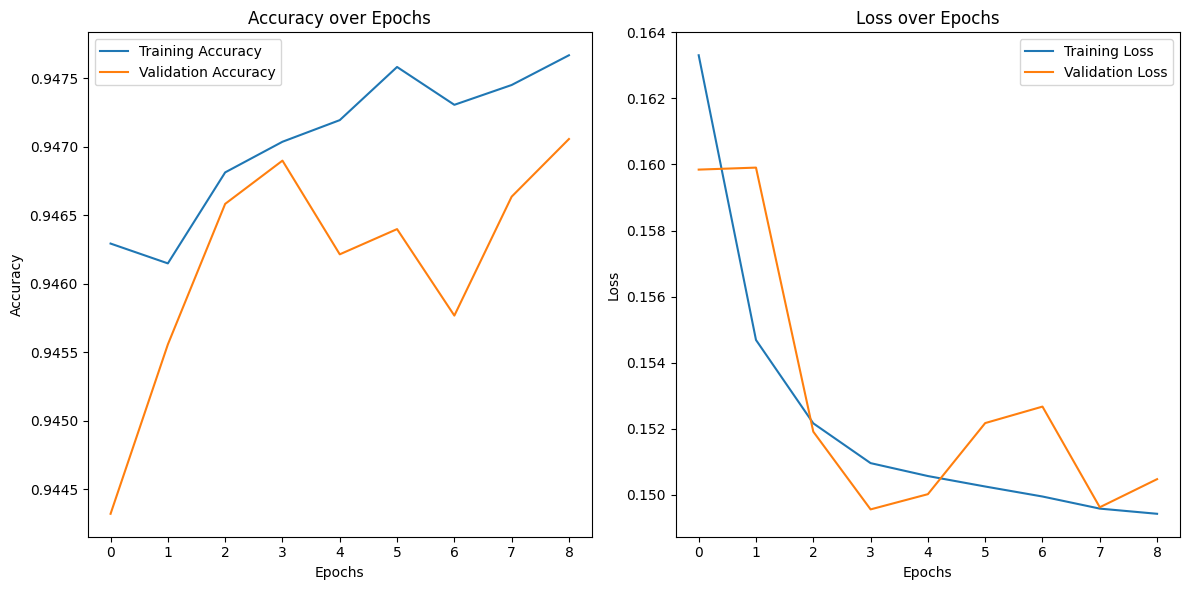

In [43]:
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [44]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)


print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

1486/1486 - 0s - 267us/step - accuracy: 0.9450 - loss: 0.1542
Test Loss: 0.15417417883872986
Test Accuracy: 0.9449774622917175


1486/1486 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step


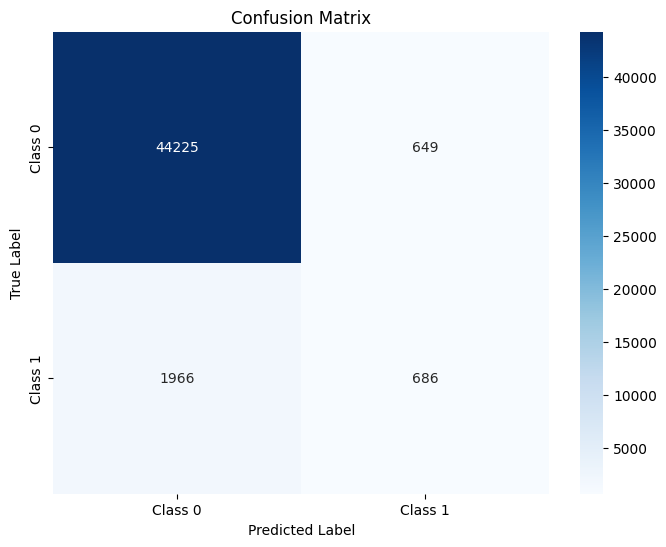

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)


y_pred_classes = (y_pred > 0.5).astype(int)  

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [46]:
import pickle


with open('../pickle_files/heart_model_pickle.pkl', 'wb') as file:
    pickle.dump(model, file)
